In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/77639914/ndvi-double-logistic-curve-fitting-in-python

In [3]:
def model(t, wNDVI, mNDVI, S, A, mS, mA):
    sigmoid1 = 1 / (1 + np.exp(-mS * (t - S)))
    sigmoid2 = 1 / (1 + np.exp( mA * (t - A)))
    seasonal_term = sigmoid1 + sigmoid2 - 1
    return wNDVI + (mNDVI - wNDVI) * seasonal_term

def weights(t, wNDVI, mNDVI, S, A, mS, mA, r):
    tr = 100 * (t - S) / (A - S)
    tr = np.clip(tr, 0, 100)
    return np.exp(-np.abs(r) / (1 + tr / 10))

In [12]:
t = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270]) / 365
y = np.array([0.58, 0.583, 0.713, 0.807, 0.832, 0.878, 0.886, 0.863, 0.717])

In [13]:
p0 = [np.min(y), np.max(y), np.mean(t), np.mean(t), 1., 1.]

In [14]:
popt, pcov = optimize.curve_fit(model, t, y, p0=p0)
popt

/tmp/ipykernel_3651/4125714048.py:2: RuntimeWarning: overflow encountered in exp
  sigmoid1 = 1 / (1 + np.exp(-mS * (t - S)))
/tmp/ipykernel_3651/4125714048.py:3: RuntimeWarning: overflow encountered in exp
  sigmoid2 = 1 / (1 + np.exp( mA * (t - A)))


array([ 0.55389364,  0.87556035,  0.25739924,  0.7404308 , 17.85264497,
       39.94634541])

In [15]:
yhat = model(t, *popt)

In [16]:
sigma = weights(t, *p0, np.abs(y - yhat))

/tmp/ipykernel_3651/4125714048.py:8: RuntimeWarning: divide by zero encountered in divide
  tr = 100 * (t - S) / (A - S)


In [17]:
sigma

array([0.98747321, 0.977987  , 0.98633013, 0.99825989, 0.97621163,
       0.99934862, 0.99891173, 0.99991004, 0.99999384])

In [18]:
tlin = np.linspace(t.min(), t.max(), 200)

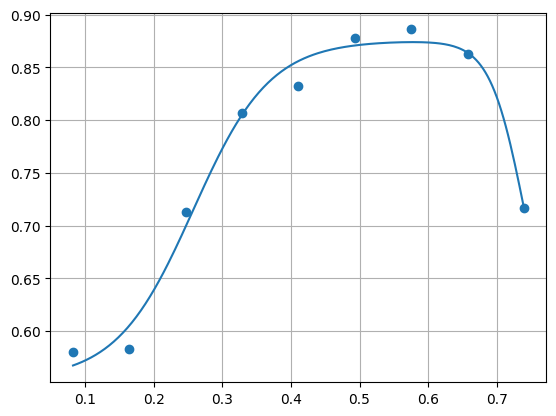

In [19]:
fig, axe = plt.subplots()
axe.scatter(t, y)
axe.plot(tlin, model(tlin, *popt))
axe.grid()